## 8/26/2016 This is a practice to use machine learning to predict admission using a dataset (http://www.ats.ucla.edu/stat/data/binary.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

pd.set_option('display.max_colwidth', -1)

In [2]:
cd "C:\Users\Zhenning\Documents\Code\practice"

C:\Users\Zhenning\Documents\Code\practice


In [3]:
df = pd.read_csv("binary.csv")  # this dataset can be feteched from "http://www.ats.ucla.edu/stat/data/binary.csv"

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 15.6 KB


In [6]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
df.shape

(400, 4)

In [8]:
# rename "rank" column to avoid a confliction with a dataframe method rank
col_names = ["admit", "gre", "gpa", "reputation"]
df.columns = col_names
df.head()

,admit,gre,gpa,reputation
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Dataset summary and look at data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000920EAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009406C18>]], dtype=object)

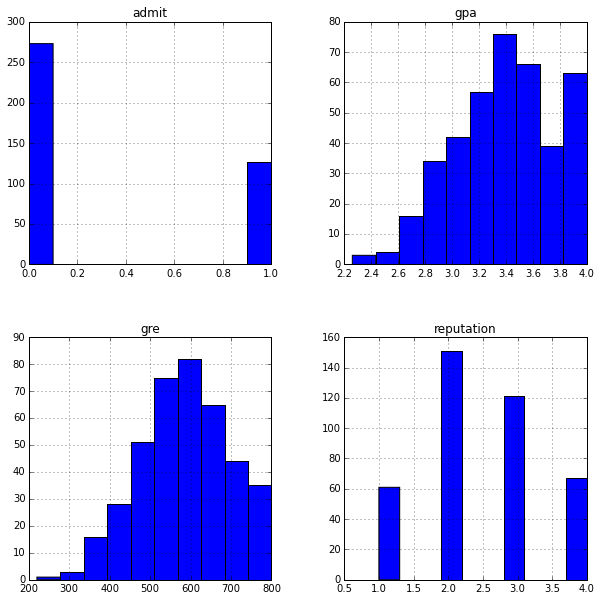

In [9]:
# plot each feature 
df.hist(figsize = (10, 10))

### The admission column, which is our label for data point, has uneven number of two groups. For machine learning, it may be worhtwile to create stratified splits for cross validation instead of simple train and test set split. 

In [10]:
# calculate the majority class prediction accuracy
admit_group = df.groupby( "admit")

In [11]:
admit_group.describe()

gpa         gre  reputation
admit                                          
0     count  273.000000  273.000000  273.000000
      mean   3.343700    573.186813  2.641026  
      std    0.377133    115.830243  0.917198  
      min    2.260000    220.000000  1.000000  
      25%    3.080000    500.000000  2.000000  
      50%    3.340000    580.000000  3.000000  
      75%    3.610000    660.000000  3.000000  
      max    4.000000    800.000000  4.000000  
1     count  127.000000  127.000000  127.000000
      mean   3.489213    618.897638  2.149606  
      std    0.370177    108.884884  0.917889  
      min    2.420000    300.000000  1.000000  
      25%    3.220000    540.000000  1.000000  
      50%    3.540000    620.000000  2.000000  
      75%    3.755000    680.000000  3.000000  
      max    4.000000    800.000000  4.000000

In [12]:
majority_class_pred = 127 /273.0
print "majority class prediction", majority_class_pred

majority class prediction 0.465201465201


admit
0    [[Axes(0.125,0.563043;0.336957x0.336957), Axes(0.563043,0.563043;0.336957x0.336957)], [Axes(0.125,0.125;0.336957x0.336957), Axes(0.563043,0.125;0.336957x0.336957)]]
1    [[Axes(0.125,0.563043;0.336957x0.336957), Axes(0.563043,0.563043;0.336957x0.336957)], [Axes(0.125,0.125;0.336957x0.336957), Axes(0.563043,0.125;0.336957x0.336957)]]
dtype: object

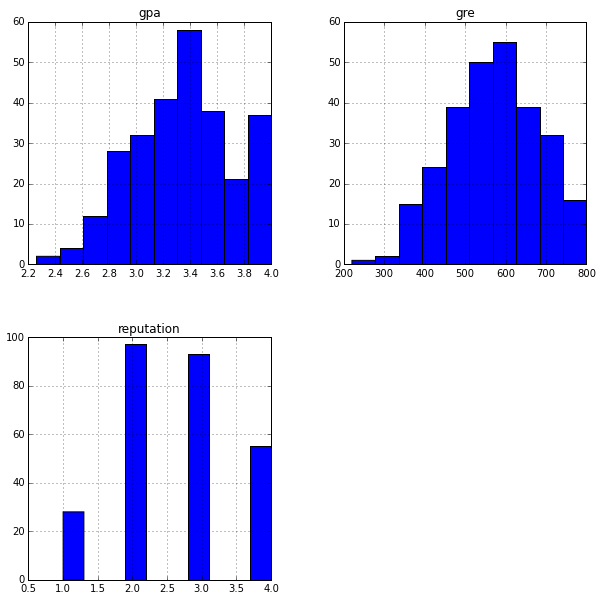

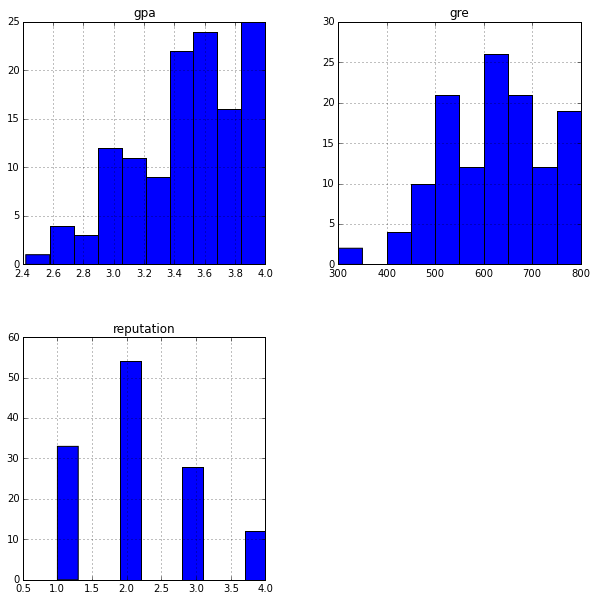

In [13]:
df.groupby("admit").hist(figsize = (10,10))

## Feature engineering: dummy variables

In [14]:
dummy_rep = pd.get_dummies(df["reputation"], prefix = "reputation")

In [15]:
dummy_rep.head()

,reputation_1,reputation_2,reputation_3,reputation_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [16]:
df = df.drop('reputation', axis = 1)  # drop the original reputation column
df = df.join(dummy_rep)
df.head()

,admit,gre,gpa,reputation_1,reputation_2,reputation_3,reputation_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


### Create a new variable "gre_gpa", which is to multiply gre with gpa. Because both factors are important in determining the admission, it's possible that the multiplication of two will give better prediction on admission.

In [17]:
df["gre_gpa"] = df['gre'] * df ['gpa']

In [18]:
df.head()

,admit,gre,gpa,reputation_1,reputation_2,reputation_3,reputation_4,gre_gpa
0,0,380,3.61,0,0,1,0,1371.8
1,1,660,3.67,0,0,1,0,2422.2
2,1,800,4.00,1,0,0,0,3200.0
3,1,640,3.19,0,0,0,1,2041.6
4,0,520,2.93,0,0,0,1,1523.6


## Split dataset for training model

In [19]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [20]:
X = df[["gre", "gpa", "gre_gpa", "reputation_1", "reputation_2", "reputation_3", "reputation_4"]]
y = df["admit"]

In [34]:
sss = StratifiedShuffleSplit(y, n_iter = 100, test_size = 0.1, random_state = 0)

In [22]:
# another way is to create simple train, test set split. However, this split may have issue due to unbalanced labels in two groups
# I will create a simple train, test set for now and compare training results with sss later
X_train, X_test = train_test_split(X, test_size = 0.3, random_state = 0)
y_train, y_test = train_test_split(y, test_size = 0.3, random_state =0)

### Scale data between 0 and 1

In [23]:
mms = MinMaxScaler()
mms.fit(X)
X = mms.transform(X)


### Create a helper function to store algorithm performance 

In [24]:
from sklearn import metrics

In [25]:
result_table = []
def predict_score(clf, features, labels, folds = 1000):
    
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
    
        #store the scores in a list and convert it to a dataframe
        result = [str(clf), "{0:.4f}".format(precision), "{0:.4f}".format(recall), "{0:.4f}".format(accuracy),
              "{0:.4f}".format(f1),  "{0:.4f}".format(f2)]
        if result not in result_table:
            result_table.append(result)
            
        result_df = pd.DataFrame(result_table, columns =["Classifier", "Precision", "Recall", "Accuracy", "F1", "F2"])
        return result_df
    
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

## Test a few machine learning algorithms

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.grid_search import GridSearchCV


### 1. Logistic regression

In [35]:
params = { "C":  [0.1, 1, 10, 20, 30, 40, 50, 60,70,  80, 100]}
log_clf = LogisticRegression()

gs_clf = GridSearchCV(log_clf, param_grid = params, scoring = "f1", cv = sss)
gs_clf.fit(X, y)

log_clf = gs_clf.best_estimator_
print "Best logistic regression:", log_clf

Best logistic regression: LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [36]:
predict_score(log_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617


In [37]:
print "coefficients:", log_clf.coef_ # it is strange that gre_gpa varialbe has negative effect on admission

coefficients: [[ 3.9217302   2.86990444 -3.52210482  0.2555462  -0.52825422 -1.16272621
  -1.17522979]]


### 2. Naive Bayes 

In [38]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

predict_score(nb_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617


### 3. Decision tree

In [42]:
params = { "min_samples_split":  [2, 5, 10, 20],
           "max_depth" : [20, 25, 30,40]}

tree_clf = DecisionTreeClassifier(random_state = 0)

gs_clf = GridSearchCV(tree_clf, param_grid = params, scoring = "f1", cv = sss)
gs_clf.fit(X, y)

tree_clf = gs_clf.best_estimator_
print "Best found classifier:", tree_clf

Best found classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')


In [43]:
predict_score(tree_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617
4,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3945,0.3862,0.6079,0.3903,0.3879


### 4. Adaboost

In [44]:
# Ensemble method, Adaboost
t1= time.time()
params = { "n_estimators": [10, 50, 100, 200, 400],
           "learning_rate": [0.1, 1, 5]}

adaboost_clf = AdaBoostClassifier(random_state = 0)

gs_clf = GridSearchCV(adaboost_clf, param_grid = params, scoring = "f1", cv = sss)
gs_clf.fit(X, y)

adaboost_clf = gs_clf.best_estimator_
print "Best found classifier:", adaboost_clf
t2= time.time()
print "time", t2-t1

Best found classifier: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=400, random_state=0)
time 197.871999979


In [45]:
predict_score(adaboost_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617
4,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3945,0.3862,0.6079,0.3903,0.3879
5,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,\n n_estimators=400, random_state=0)",0.4814,0.3672,0.6658,0.4166,0.3855


### 5. Random Forest

In [46]:
#  Random forest: fits a number of decision tree classifiers on various sub-samples of the dataset and 
# use averaging to improve the predictive accuracy and control over-fitting
t1= time.time()
params = {"n_estimators": [10, 25, 50, 75, 100],
          "min_samples_split": [ 2, 5, 7, 10, 20]}

rf_clf = RandomForestClassifier(random_state = 0)

gs_clf = GridSearchCV(rf_clf, param_grid = params, scoring = "f1", cv =sss)
gs_clf.fit(X, y)

rf_clf = gs_clf.best_estimator_
print "Best found classifier:", rf_clf
t2= time.time()
print "time", t2-t1

Best found classifier: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
time 123.995000124


In [47]:
predict_score(rf_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617
4,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3945,0.3862,0.6079,0.3903,0.3879
5,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,\n n_estimators=400, random_state=0)",0.4814,0.3672,0.6658,0.4166,0.3855
6,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=None, max_features='auto', max_leaf_nodes=None,\n min_samples_leaf=1, min_samples_split=5,\n min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)",0.4946,0.3145,0.6728,0.3845,0.3392


### 6. K Nearest Neighbors

In [48]:
t1= time.time()
params = {"n_neighbors": [3, 5, 10, 15, 20],
          "weights": ["uniform", "distance"]}

KNN_clf = KNeighborsClassifier()

gs_clf = GridSearchCV(KNN_clf, param_grid = params, scoring = "f1", cv =sss) 

gs_clf.fit(X, y)

KNN_clf = gs_clf.best_estimator_
print "Best found classifier:", KNN_clf
t2= time.time()
print "time", t2-t1

Best found classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='distance')
time 3.6130001545


In [49]:
predict_score(KNN_clf, X, y)

,Classifier,Precision,Recall,Accuracy,F1,F2
0,"LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5942,0.2298,0.6987,0.3315,0.2620
1,GaussianNB(),0.5001,0.4575,0.6751,0.4779,0.4655
2,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3951,0.3872,0.6082,0.3911,0.3888
3,"LogisticRegression(C=60, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='ovr',\n penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n verbose=0)",0.5956,0.2295,0.6989,0.3314,0.2617
4,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,\n max_features=None, max_leaf_nodes=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n random_state=0, splitter='best')",0.3945,0.3862,0.6079,0.3903,0.3879
5,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,\n n_estimators=400, random_state=0)",0.4814,0.3672,0.6658,0.4166,0.3855
6,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=None, max_features='auto', max_leaf_nodes=None,\n min_samples_leaf=1, min_samples_split=5,\n min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)",0.4946,0.3145,0.6728,0.3845,0.3392
7,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_neighbors=5, p=2, weights='distance')",0.4782,0.3508,0.6646,0.4047,0.3705


## Summary
### In this practice, I tried a few different classifiers in sklearn and found that K Nearest Neighbors (k=10) gives the best prediction on this dataset. 

In [50]:
#!ipython nbconvert --to python Prediction_Student_Admission.ipynb